<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 2

Olivia Fan, Frankie Willard, Sam Carpenter

### Problem 0 (3 points)

## Part 1: High-Dimensional Neighborhoods 

### Problem 1.1 (Exam Style)

0-dimensional neighbors(8):
<br> +++, ++-, +-+, +--, -+-, --+, ---, -++
<br>1-dimensional neighbors (12):
<br> 0++, 0+-, 0--, 0-+, +0+, +0-, -0-, -0+, ++0, +-0, -+0, --0
<br>2-dimensional neighbors (6): 
<br> +00, -00, 0+0, 0-0, 00+, 00-

The total number of bins for one particular internal bin $B_{ijk}$ is 26, because the total number of cubes making contact with the internal cube is $3^2 - 1 = 26$
The number of 0-dimensional neighbors is 8 because there are 8 vertices on the tips of the entire 3-bin combined large cube. The number of 1-dimensional neighbors is 12, because there is each one on the 12 edges of the combined 3-bin large cube surrounding the internal bin. The number of 2-dimensional neighbors is 6 because there are 6 surfaces touching the internal bin surrounded by the combined 3-bin large cube.

### Problem 1.2 (Exam Style)

$$m(d) = 3^d -1\\
n(d,0) = 2^d \\
n(d,1) = {d \choose 1} \times 2^{d-1}\\
n(d,b) = {d \choose b} \times 2^{d-b}$$

$$
\begin{array}{c|c|*{5}{c}}
d & m(d) & n(d, 0) & n(d, 1) & n(d, 2) & n(d, 3) & n(d, 4) \\\hline
1 & 2 & 2 & - & - & - & - \\
2 & 8 & 4 & 4 & - & - & - \\
3 & 26 & 8 & 12 & 6 & - & - \\
4 & 80 & 16 & 32 & 24 & 8 & - \\
5 & 242 & 32 & 80 & 80 & 40 & 10
\end{array}
$$

## Part 2: Random Gaussian Vectors 

### Problem 2.1

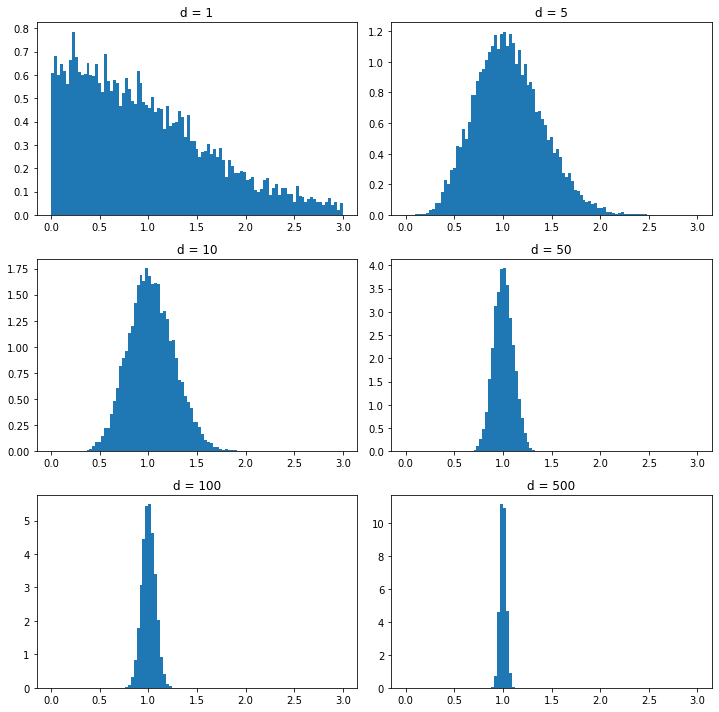

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math 
%matplotlib inline

# make an nxd numpy array p
# each row is a sample out of the Gaussian probability density
def samples(n, d):
    p = []
    for sample_size in range (0,n):
        mu = 0
        if(d==1):
            sigma = math.sqrt(math.pi/2)
        else:
            sigma = math.sqrt(1/(d-1))
        sample = np.random.normal(mu, sigma, d)
        p.append(sample)
    return p

#computes the norm of each row of p
def distances(p):
    norms = []
    for row in range(0,len(p)):
        norms.append(LA.norm(p[row]))
    return norms

bins = np.linspace(0, 3, 100)
d_values = [1,5,10,50,100,500]
# creating subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
a = ax.ravel()
#fig.text(0.5, -0.04, 'Gaussian number x', ha='center')
#fig.text(-0.04, 0.5, 'distance from origin', va='center', rotation='vertical')

index = 0;
for d in d_values:
    a[index].hist(x=distances(samples(10000, d)), bins=bins, density=True)
    a[index].set_title("d = "+str(d))
    #a[num].title("n = "+str(d))
    index+=1
plt.tight_layout()
plt.show()

As evident on the plots above, most Gaussian random d-dimensional vectors with mean zero and mean norm of 1 are concentrated at a distance from origin of 1.0 when d is large.

## Part 3: Linear Separability and Voronoi Diagrams 

### Problem 3.1 (Exam Style)

Since the set V is comprised of vertical lines, $a_2 = 0$
<br> The vertical line is in the form $a_1 x_1+b = 0 $
<br> $$x_1 = -\frac{b}{a_1} $$
Where $$ 2 \leq -\frac{b}{a_1}<5$$
<br>Because the highest value of $x_1$ in data points with label 0 is 2, and the lowest value of $x_2$ in data points with label 1 is 5.

When $a_1 = 1$
<br> The function becomes $x_1+b=0$
<br> where $-5 < b \leq -2$

### Problem 3.2 (Exam Style)

H is the empty set, as there is no horizontal line that separates the set T correctly. The $x_2$ range for data points with label of 0 is (1,3) which completely overlaps and is contained by the $x_2$ range of data points with label 1 which is is (0,4). 

### Problem 3.3 (Exam Style)

There are four lines that satisfy the condition for barely separating the training set 
T:
<br>$l_1$ that passes through p(0,1), q(2,3)
<br>$l_2$ that passes through p(0,1), u(5,4)
<br>$l_3$ that passes through q(2,3), r(5,0)
<br>$l_4$ that passes through u(5,4), r(5,0)
<br> the line through two distinct points $(d_1, d_2)$ and $(e_1,e_2)$ has equation:
$$(e_2-d_2)(x_1-d_1) = (e_1-d_1)(x_2-d_2)$$
Therefore the four equations are:
$$ (3-1)(x_1-0) = (2-0)(x_2 - 1)\\
(4-1)(x_1-0) = (5-0)(x_2 - 1)\\
(0-3)(x_1-2) = (5-2)(x_2 - 3)\\
(0-4)(x_1-5) = (5-5)(x_2 - 4)$$
Which simplifies to
$$ 2x_1 = 2x_2-2\\
 3x_1 = 5x_2-5\\
 -3x_1+6 = 3x_2 - 9\\
 -4x_1+20 = 0 $$
Put in the standard form:
$$ 2x_1 - 2x_2+2 = 0\\
 3x_1 - 5x_2+5 = 0\\
 -3x_1 - 3x_2 +15 = 0\\
 -x_1+5 = 0 $$
 
Simplify and put in the form of the desired sign in front of coefficients:
$$ x_1 - x_2+1 = 0\\
 3x_1 - 5x_2+5 = 0\\
 x_1 + x_2 -5 = 0\\
 x_1-5 = 0 $$

### Problem 3.4 (Exam Style)

(a) The Voronoi diagram has 5 edges
<br> (b) (2,2) and (3,1)
<br> (c) The equations of the lines that contain the edges are as follows: 
<br> PQ bisector: $y-2 = 0 $
<br> QR bisector: $x-2 = 0 $
<br> PS bisector: $x - 3 = 0$
<br> RS bisector: $x-2y+1 = 0 $
<br> PR bisector: $x+y-4 = 0$

## Part 4: Nearest Neighbors

In [2]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [3]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D


def decorate(x_label=None, y_label=None, title=None,
             line_width=3, font_size=24):
    for child in plt.gca().get_children():
        if isinstance(child, Line2D):
            plt.setp(child, linewidth=line_width)
    legend_handles, _ = plt.gca().get_legend_handles_labels()
    if len(legend_handles):
        plt.legend(fontsize=font_size)
    if x_label is not None:
        plt.xlabel(x_label, fontsize=font_size, labelpad=5)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=font_size, labelpad=15)
    plt.xticks(fontsize=font_size//1.5)
    plt.yticks(fontsize=font_size//1.5)
    if title is not None:
        plt.title(title, fontsize=font_size)

Using previously downloaded file data.pkl


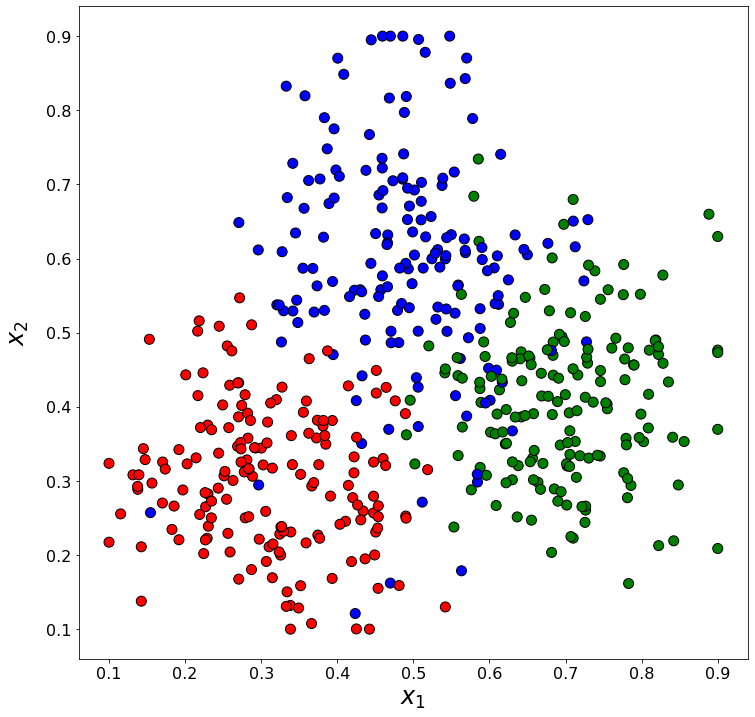

In [4]:
import pickle
from matplotlib.colors import ListedColormap



file_name = 'data.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    data = pickle.load(file)

plt.figure(figsize=(12, 12))
plt.scatter(data['x'][:, 0], data['x'][:, 1], marker='o',
            s=100, edgecolor='k', c=data['y'],
            cmap=ListedColormap(('r', 'g', 'b')))
decorate(x_label='$x_1$', y_label='$x_2$')
plt.show()

In [5]:
from sklearn.neighbors import NearestNeighbors


def neighbors(query_points, training_points, k):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(training_points)
    indices = nn.kneighbors(query_points, return_distance=False)
    return indices

In [6]:
def knn(query_points, training_samples, k, summary):
    indices = neighbors(query_points, training_samples['x'], k)
    return summary(training_samples['y'][indices])

### Problem 4.1

In [7]:
def p_label(ys):
    calc = np.empty((ys.shape[0], ys.shape[1] + 3))
    calc[:, :ys.shape[1]] = ys
    calc[:, -3] = 0
    calc[:, -2] = 1
    calc[:, -1] = 2
    return (np.array([np.histogram(a, bins=3)[0] for a in calc]) - 1) / 5

In [8]:
import numpy as np


n_grid = 200
grid_points = np.linspace(0., 1., n_grid)
xx, yy = np.meshgrid(grid_points, grid_points)
queries = np.stack((xx.flatten(), yy.flatten()), axis=1)

In [9]:
#use knn and p_label to find p ( y | q ) for every row q of queries when the number of neighbors is k = 5 , using the data set in data
# as the training set. This will be a single call of knn, since all relevant functions are vectorized.
ps = knn(query_points=queries, training_samples=data, k=5, summary=p_label)

#You will then reshape each of the three columns of the resulting 40000x3 array p back to an n_grid by n_grid array using numpy.reshape
# and display each reshaped array in a subplot of a single figure (matplotlib.pyplot.subplot(1, 3, y+1)). Column p[:, y] represents 
#p(y|q), and the title for the subplot should indicate that.

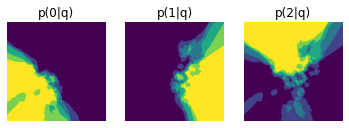

In [10]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(width, height))

#NOT PRINTING 1, 2, 3
for y in [0,1,2]:
    plt.subplot(1, 3, y+1)
    plt.title("p("+str(y)+"|q)")
    plt.axis('off')
    current_y = np.reshape(ps[:,y], (n_grid, n_grid))
    plt.imshow(current_y, cmap=plt.cm.viridis, origin='lower')

### Problem 4.2

In [11]:
def majority(ys):
    ps  = p_label(ys)
    out = ps.argmax(axis=1)
    return out

In [12]:
%matplotlib inline
import matplotlib

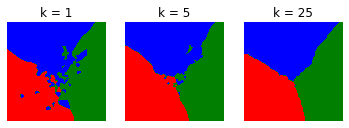

In [14]:
ks = [1,5,25]

for i in range(len(ks)):
    k = ks[i]

      #Change to use k, majoritt
    majorities = knn(query_points=queries, training_samples=data, k=k, summary=majority)
    
    plt.subplot(1, 3, i+1)
    plt.title("k = "+str(k))
    plt.axis('off')
    
    current_maj = np.reshape(majorities, (n_grid, n_grid))
      #change to color map
    plt.imshow(current_maj, cmap=matplotlib.colors.ListedColormap(('r', 'g', 'b')), origin='lower')